load data
plot data

In [1]:
import numpy as np
import pickle
import pandas as pd
import time
from umap import UMAP

In [2]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [3]:
from tfumap.paths import FIGURE_DIR, save_fig

In [4]:
save_loc = DATA_DIR / 'reconstruction_acc' 

In [5]:
datasets = [
    'cassins_dtw',
    'cifar10',
    'fmnist',
    'macosko2015',
    'mnist'
]

In [6]:
recon_acc = pd.concat([pd.read_pickle(save_loc / (dataset + '.pickle')) for dataset in datasets])
recon_acc[:3]

,method_,dimensions,dataset,MSE,MAE,MedAE,R2
0,AE,2,cassins_dtw,0.002750,0.019565,0.011422,-8.223918e+05
1,AE,64,cassins_dtw,0.002769,0.019662,0.011546,-4.694638e+07
2,network,2,cassins_dtw,0.002793,0.020141,0.012264,-6.232119e+05


In [7]:
list((save_loc / 'vae').glob('*/*.pickle'))

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/2/cassins.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/2/cifar10.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/2/mnist.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/2/macosko2015.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/2/fmnist.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/2/cassins_dtw.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/64/fmnist.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/64/cifar10.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_rep

In [8]:
! ls /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/reconstruction_acc/vae/64

cassins_dtw.pickle  fmnist.pickle	mnist.pickle
cifar10.pickle	    macosko2015.pickle


In [9]:
recon_acc = pd.concat(
    [pd.concat([pd.read_pickle(i) for i in list((save_loc / 'vae').glob('*/*.pickle'))])    , recon_acc]
)

In [10]:
recon_acc = pd.concat(
    [pd.concat([pd.read_pickle(i) for i in list((save_loc / 'ae_only').glob('*/*.pickle'))])    , recon_acc]
)

In [11]:
median_df = (
    recon_acc[["method_", "dimensions", "dataset", "MSE"]]
    .groupby(["method_", "dimensions", "dataset"])
    .median()
)
median_df = median_df.T.melt()
median_df.loc[median_df.dataset == 'cassins', 'dataset'] = 'cassins_dtw'
median_df

,method_,dimensions,dataset,value
0,AE,2,cassins_dtw,0.002750
1,AE,2,cifar10,0.036410
2,AE,2,fmnist,0.024047
3,AE,2,macosko2015,0.000507
4,AE,2,mnist,0.035955
5,AE,64,cassins_dtw,0.002769
6,AE,64,cifar10,0.009391
7,AE,64,fmnist,0.009165
8,AE,64,macosko2015,0.000277
9,AE,64,mnist,0.002684


In [12]:
import seaborn as sns

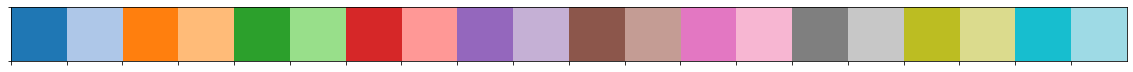

In [13]:
palette = sns.color_palette('tab20', 20)
sns.palplot(palette)

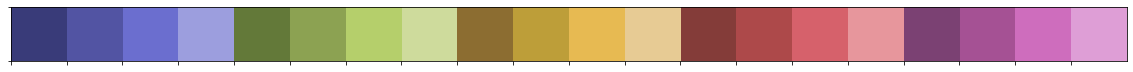

In [14]:
palette = sns.color_palette('tab20b', 20)
sns.palplot(palette)

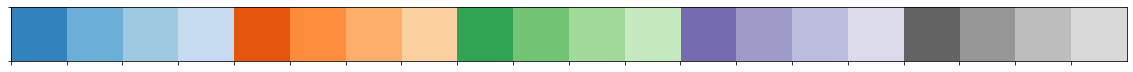

In [15]:
pal20c = sns.color_palette('tab20c', 20)
sns.palplot(pal20c)

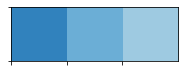

In [16]:
palette = pal20c[0:3]
sns.palplot(palette)

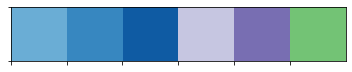

In [17]:
palette = sns.color_palette('Blues', 5)[2:] + sns.color_palette('Purples', 2) + sns.color_palette('Greens', 1)
sns.palplot(palette)

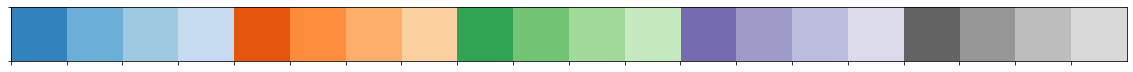

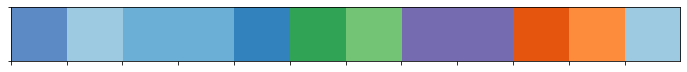

In [27]:
pal20c = sns.color_palette('tab20c', 20)
sns.palplot(pal20c)
hue_dict = {
    "umap-learn": list(np.array(pal20c[3])**4),
    "direct": pal20c[2],
    "AE": pal20c[1],
    "autoencoder": pal20c[1],
    "network": pal20c[0],
    'vae':  pal20c[8], 
    'ae_only':  pal20c[9],
    "pca":  pal20c[12],
    "PCA":  pal20c[12],
    "TSNE": pal20c[4], 
    "parametric-tsne":pal20c[5],
    "network-cpu": pal20c[2],

}
sns.palplot([hue_dict[i] for i in hue_dict.keys()])

In [28]:
hue_list = ["umap-learn", "AE", "network",  'vae', 'ae_only', "pca"]

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.


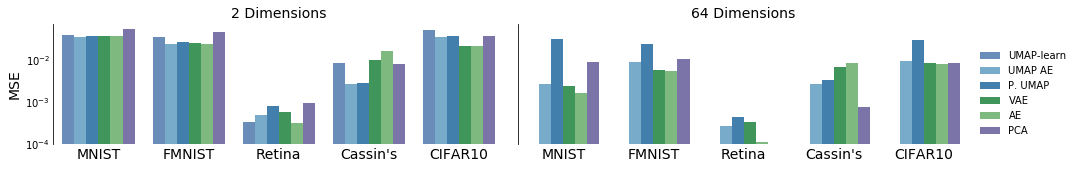

In [32]:
import matplotlib as mpl
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

fg = sns.catplot(
    x="dataset",
    y="value",
    hue="method_",
    hue_order=hue_list,
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dimensions",
    height=2.75, 
    aspect=2.5,
    data=median_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "MSE")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'AE'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'pca'))[0][0]].set_text('PCA')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'vae'))[0][0]].set_text('VAE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'ae_only'))[0][0]].set_text('AE')
#fg._legend.texts[3].set_text("PCA")

ax.set_yscale('log'); ax.set_ylim([1e-4,-1])
#fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')
#ax.set_yscale('log')

save_fig(FIGURE_DIR/'recon_acc', save_pdf=True, dpi=300, pad_inches=0.1)